Howework 1 Linear programs  
Name: Zihao Qiu   
Campus ID: 9079810942  
Email: zqiu34@wisc.edu  


### Problem1 (Warm-up)

First I use Clp solver.

In [20]:
using JuMP, Clp

m = Model(solver = ClpSolver())

@variable(m, 0 <= x1 <= 3)
@variable(m, 0 <= x2 <= 3)
@variable(m, 0 <= x3 <= 3)

@constraint(m, x2 + x3 <= 2x1)

@objective(m, Max, 5x1 - x2 + 11x3)

@time status = solve(m)

println(status)
println("x1: ", getvalue(x1))
println("x2: ", getvalue(x2))
println("x3: ", getvalue(x3))
println("objective value: ", getobjectivevalue(m))

  0.000571 seconds (70 allocations: 4.938 KiB)
Optimal
x1: 3.0
x2: 0.0
x3: 3.0
objective value: 48.0


Then ECOS solver:

In [21]:
using JuMP, ECOS

m = Model(solver = ECOSSolver())

@variable(m, 0 <= x1 <= 3)
@variable(m, 0 <= x2 <= 3)
@variable(m, 0 <= x3 <= 3)

@constraint(m, x2 + x3 <= 2x1)

@objective(m, Max, 5x1 - x2 + 11x3)

@time status = solve(m)

println(status)
println("x1: ", getvalue(x1))
println("x2: ", getvalue(x2))
println("x3: ", getvalue(x3))
println("objective value: ", getobjectivevalue(m))

  0.000865 seconds (526 allocations: 33.313 KiB)
Optimal
x1: 2.999999998571697
x2: 8.223270148055816e-9
x3: 3.000000000197723
objective value: 47.999999986810174

ECOS 2.0.2 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -2.250e+01  -8.440e+01  +1e+02  2e-01  3e-01  1e+00  1e+01    ---    ---    1  1  - |  -  - 
 1  -4.615e+01  -5.603e+01  +2e+01  2e-02  6e-02  7e-01  3e+00  0.8410  6e-02   0  0  0 |  0  0
 2  -4.726e+01  -4.850e+01  +3e+00  3e-03  8e-03  2e-01  4e-01  0.9283  7e-02   0  0  0 |  0  0
 3  -4.799e+01  -4.803e+01  +8e-02  1e-04  2e-04  7e-03  1e-02  0.9798  9e-03   1  0  0 |  0  0
 4  -4.800e+01  -4.800e+01  +9e-04  1e-06  3e-06  8e-05  1e-04  0.9890  1e-04   1  0  0 |  0  0
 5  -4.800e+01  -4.800e+01  +9e-06  1e-08  3e-08  9e-07  1e-06  0.9890  1e-04   1  0  0 |  0  0
 6  -4.800e+01  -4.800e+01  +1e-07  1e-10  3e-10  1e-08  1e-08  0.9890  1e-0

Then SCS solver:

In [25]:
using JuMP, SCS

m = Model(solver = SCSSolver())

@variable(m, 0 <= x1 <= 3)
@variable(m, 0 <= x2 <= 3)
@variable(m, 0 <= x3 <= 3)

@constraint(m, x2 + x3 <= 2x1)

@objective(m, Max, 5x1 - x2 + 11x3)

@time status = solve(m)

println(status)
println("x1: ", getvalue(x1))
println("x2: ", getvalue(x2))
println("x3: ", getvalue(x3))
println("objective value: ", getobjectivevalue(m))

  0.001205 seconds (441 allocations: 27.609 KiB)
Optimal
x1: 2.9999856529908175
x2: 4.149724927436506e-6
x3: 3.0000130627112145
objective value: 48.000067805052524
----------------------------------------------------------------------------
	SCS v1.1.5 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 9
eps = 1.00e-04, alpha = 1.80, max_iters = 20000, normalize = 1, scale = 5.00
Variables n = 3, constraints m = 7
Cones:	linear vars: 7
Setup time: 6.83e-05s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.#Je+00  1.#Je+00 -1.#Je+00 -1.#Je+00 -1.#Je+00  1.#Je+00  2.59e-05 
   100| 8.00e-05  1.91e-04  8.48e-06 -4.80e+01 -4.80e+01  0.00e+00  9.73e-05 
   140| 4.49e-

It's obvious that $x_1$=3, $x_2$=0, $x_3$=3 can make the objective value maximum. So the first answer(by Clp) is the most accurate. The second answer(by ECOS) is a little bit more accurate than the third answer(by SCS).

About the speed, the first solver is the fastest. The second solver is faster than the third solver.

I think it's not difficult to explain. Because from Clp to ECOS to SCS, the solver is more and more generic. Clp can solve the problem directly. However, ECOS should do some work to convert the problem and SCS need to do even more work to convert the problem. So from Clp to SCS, the speed is getting slower and the accuracy is getting lower as well.


### Problem2 (Crop planning)

#### a) 
I use w to represent wheat and c to represent corn. Then the model can be expressed as follows:  
$$
\begin{align}
\mathop {\max }\limits_{w,c} \quad 200w+300c \\
subject\ to: 3w+2c \leq 100 \\
             2w+4c \leq 120 \\
             0 \leq w \leq 45 \\
             0 \leq c \leq 45
\end{align}
$$

Julia code is as follows:

In [30]:
using JuMP, Clp

m = Model(solver = ClpSolver())

@variable(m, 0 <= w <= 45)
@variable(m, 0 <= c <= 45)

@constraint(m, 3w + 2c <= 100)
@constraint(m, 2w + 4c <= 120)

@objective(m, Max, 200w + 300c)

@time status = solve(m)

println(status)
println("w: ", getvalue(w))
println("c: ", getvalue(c))
println("objective value: ", getobjectivevalue(m))

  0.000776 seconds (70 allocations: 4.797 KiB)
Optimal
w: 19.99999999999999
c: 20.000000000000007
objective value: 10000.0


So we can see that Jane should plant 20 acres wheat and 20 acres core. Tha maximum of profit is \$10000.

#### b)

After separating the parameters from the solution, we can get the Julia code as follows:

#### Problem Data

In [14]:
# the types of crop
crop = [:wheat, :corn]

# ingredients involved
ingredients = [:labor, :fertilizer]

# profits returned (for each crop)
profit = Dict(zip(crop, [200, 300]))

# ingredients available
quant_avail = Dict(zip(ingredients, [100, 120]))

# recipes (crop ingredients)
using NamedArrays
recipe_mat = [3 2
              2 4 ]
recipe = NamedArray(recipe_mat, (crop, ingredients), ("crop", "ingredients"))
;

#### Problem Model

In [15]:
using JuMP, Clp
m = Model(solver = ClpSolver())

@variable(m, 45 >= Crop[crop] >= 0)

@expression(m, total_profit, sum(profit[s]*Crop[s] for s in crop))

@constraint(m, constr[i in ingredients], sum(recipe[s,i]*Crop[s] for s in crop) 
                <= quant_avail[i])

@objective(m, Max, total_profit)

@time statue = solve(m)
println(getvalue(Crop))
println("Total profit is: \$", getvalue(total_profit))

  2.954500 seconds (1.41 M allocations: 73.626 MiB, 0.96% gc time)
Crop: 1 dimensions:
[wheat] = 19.99999999999999
[ corn] = 20.000000000000007
Total profit is: $10000.0


It has the same answer to (a)

#### c)

In [1]:
using PyPlot

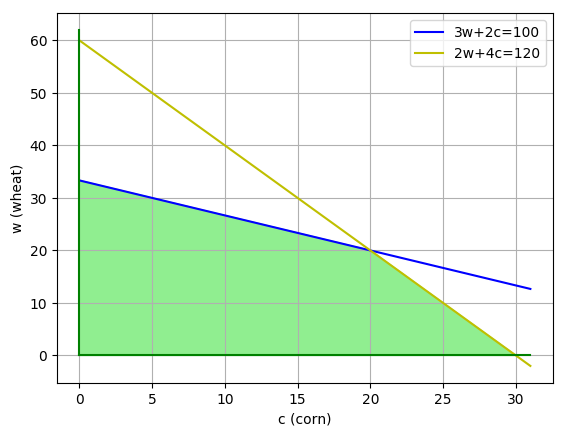

PyObject <matplotlib.legend.Legend object at 0x000000001FD07B38>

In [3]:
c = linspace(0, 31, 100)        # x axis
w1 = (100-2*c)/3
w2 = 60-2*c
axises = c-c
plot(c, w1, "b", label="3w+2c=100")
plot(c, w2, "y", label="2w+4c=120")
plot(c, axises, "g")
plot(axises, 2*c, "g")
xlabel("c (corn)")
ylabel("w (wheat)")
fill([0, 0, 20, 30], [0, 100/3, 20, 0], color="lightgreen")
grid("on")
legend()

The feasible set of this problem is the lightgreen area and its four vertex are:(0,0), (0,$\frac{100}{3}$), (20,20), (30,0).

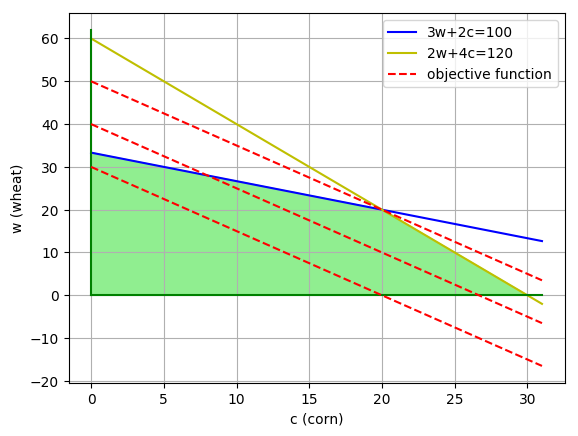

PyObject <matplotlib.legend.Legend object at 0x000000001FE0A208>

In [5]:
c = linspace(0, 31, 100)        # x axis
w1 = (100-2*c)/3
w2 = 60-2*c
axises = c-c
plot(c, w1, "b", label="3w+2c=100")
plot(c, w2, "y", label="2w+4c=120")
plot(c, axises, "g")
plot(axises, 2*c, "g")
plot(c, 30-(3*c)/2, "r--", label="objective function")
plot(c, 40-(3*c)/2, "r--")
plot(c, 50-(3*c)/2, "r--")
xlabel("c (corn)")
ylabel("w (wheat)")
fill([0, 0, 20, 30], [0, 100/3, 20, 0], color="lightgreen")
grid("on")
legend()

From the graph above, you can see the (20,20) point has the max profit.